# Detecting characteristics shared by people who have longer trip duraction 
## by Mazi Essoloani Aleza



## Investigation Overview


> During the investigation of this dataset, i explored the bike trip duration, i explored how different parameters can affect the trip duration. I found that birth year, user type, gender and start day of week are important keys parameters that affect the bike trip duration

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019, it has 183412 observations and various feature such as the duration, longitude, latitude. I dropped feature that are not needfull for this analysis.

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [21]:
# clean the dataset
# remove the null values
clean_df = bike_df.dropna()

# change the type of 'member_birth_year'
clean_df.member_birth_year = clean_df.member_birth_year.astype(int)

# remove the columns that are unrelated to the research question
clean_df.drop(columns=['start_station_id', 'start_station_name', 
                                 'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

# filter out the outlier of 'duration_sec'
clean_df = clean_df.query('duration_sec <= 20000')

# filter out the outlier of 'birth_year'
clean_df = clean_df.query('member_birth_year > 1939')

## Visualization 1 : Duration distribution
> Due the outliers, duration distribution has been right skewed, i dropped outliers and applied log transform to duration attribute and i found an unimodel distribution with a peak around 500 seconds

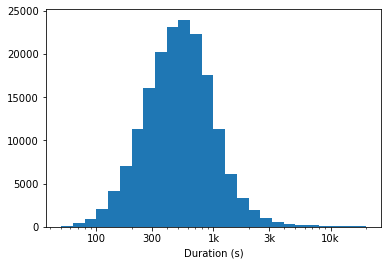

In [22]:
# set bins and ticks for the duration histogram
bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
ticks = [100, 300, 1000, 3000, 10000]
labels = [100, 300, '1k', '3k', '10k']

# plot the histogram
plt.hist(data = clean_df, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (s)');

## Visualization 2: Distribution of Month, start day and start day of week

> The next plot show information of start day and start day of week. From the chart, i have deducted that saturday and sunday have the rides with the longest duration.

In [23]:
from datetime import datetime
clean_df['start_date'] = clean_df.start_time.map(lambda x: x[:10])
clean_df['start_date'] = clean_df.start_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
clean_df['end_date'] = clean_df.end_time.map(lambda x: x[:10])
clean_df['end_date'] = clean_df.end_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

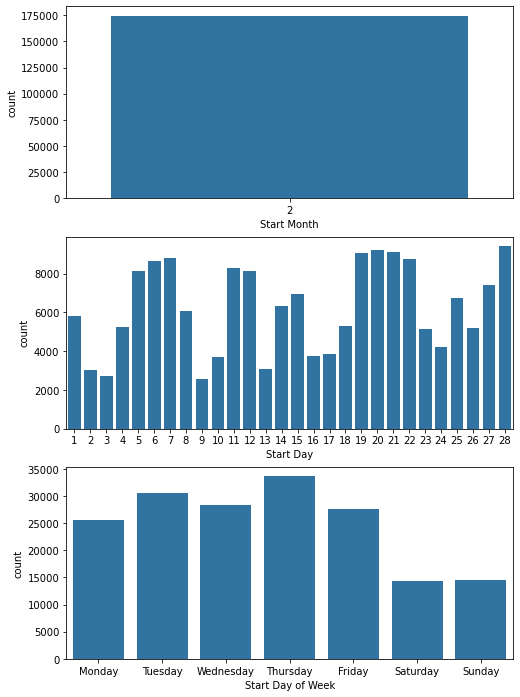

In [24]:
# extract the month, day, and day of week from the 'start_day'
clean_df['start_month'] = clean_df.start_date.map(lambda x: x.month)
clean_df['start_day'] = clean_df.start_date.map(lambda x: x.day)
clean_df['start_dayofweek'] = clean_df.start_date.map(lambda x: x.dayofweek)

base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 12])

# plot the month
plt.subplot(3, 1, 1)
sb.countplot(data=clean_df, x='start_month', color=base_color)
plt.xlabel('Start Month')

# plot the start day
plt.subplot(3, 1, 2)
sb.countplot(data=clean_df, x='start_day', color=base_color)
plt.xlabel('Start Day')

# plot the start day of week
plt.subplot(3, 1, 3)
sb.countplot(data=clean_df, x='start_dayofweek', color=base_color)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Start Day of Week');

## Visualization 3: Relationship between 'member_gender', 'duration_sec', and 'Gender'

> The duration in second, the member_gender and member type shows that the customer has the highest duration and the male customer has the highest proportion


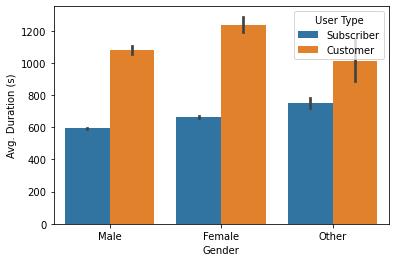

In [25]:
# relationship between user type and gender
sb.barplot(data= clean_df, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type');

## Visualization 4: duration, start day of week, user type
> The plot shows that the customer has the highest duration and the other gender is riding more in the basis of start day of week. The customers have the rides with the highest duration

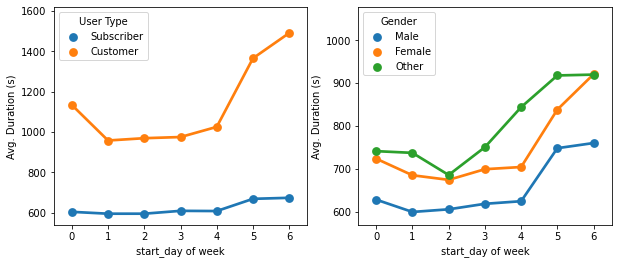

In [26]:
plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=clean_df, x='start_dayofweek', y='duration_sec', hue='user_type', errwidth=0)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')

# plot the point plot of month vs gender
plt.subplot(1, 2, 2)
sb.pointplot(data=clean_df, x='start_dayofweek', y='duration_sec', hue='member_gender', errwidth=0)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender');

**Insights in the data**
- The other gender has the longer average ride duration
- The Customers have the longer average ride duration
- The female customers have the longer ride duration
- Sutardays and sundays have the longer ride duration

**Recommendations**
> It is recommended that Ford Gobike can attract customers to become subscribers

In [27]:
!jupyter nbconvert Ford_Go_Bike_Datset_ExplorationPart_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_Go_Bike_Datset_ExplorationPart_II.ipynb to slides
[NbConvertApp] Writing 669350 bytes to Ford_Go_Bike_Datset_ExplorationPart_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\aleza\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\aleza\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\aleza\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\aleza\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\aleza\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_sin